# Assignment 2 (5 Marks)

Our dataset contains daily worldwide COVID-19 data. It is downloaded from: https://ourworldindata.org/coronavirus-source-data. Please plot the following visualizations. 

Please submit the ipynb file only.

# Question 1
Please plot the number of total cases (on March 1st, 2021) for each country on a world map.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv')
covidCases = (df[(df['date'] == "2021-03-01")].iloc[:,[0,2,3,4]])
covidCases = covidCases.rename(columns = {'iso_code':'iso_a3'})
covidCases.set_index('location', inplace = True)
covidCases

,iso_a3,date,total_cases
location,,,
Afghanistan,AFG,2021-03-01,55733.0
Africa,OWID_AFR,2021-03-01,3906140.0
Albania,ALB,2021-03-01,107931.0
Algeria,DZA,2021-03-01,113255.0
Andorra,AND,2021-03-01,10889.0
...,...,...,...
Vietnam,VNM,2021-03-01,2448.0
World,OWID_WRL,2021-03-01,114415400.0
Yemen,YEM,2021-03-01,2310.0


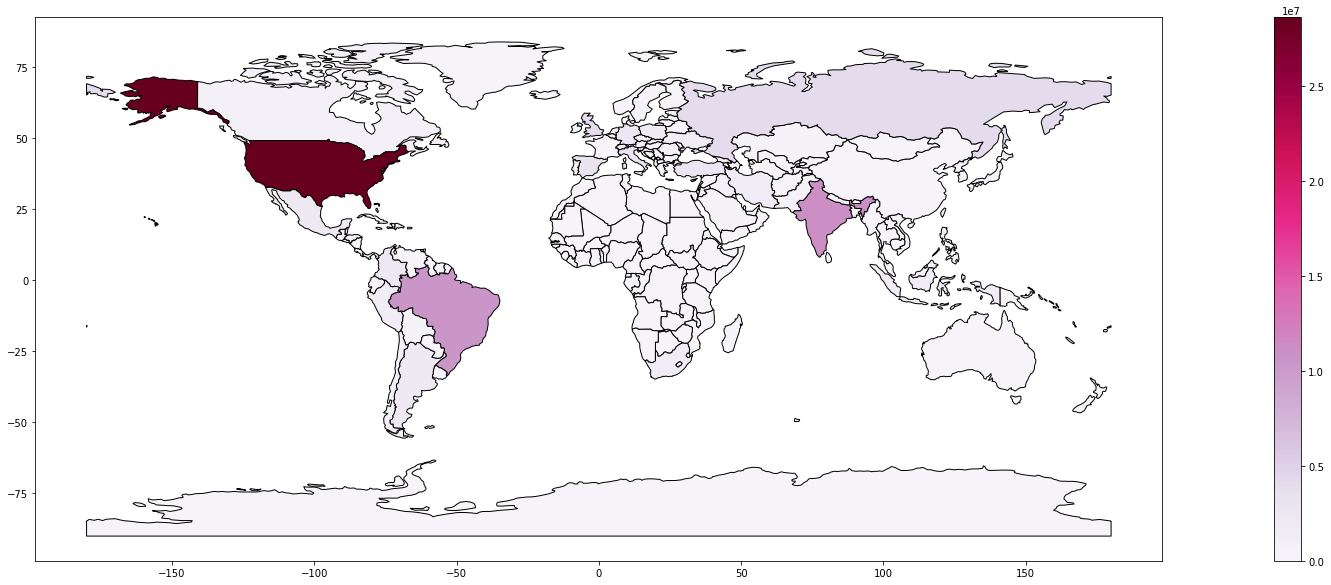

In [5]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worldMap = world.set_index('iso_a3').join(covidCases.set_index('iso_a3'))
worldMap['total_cases'] = worldMap['total_cases'].fillna(0)
worldMap.plot(column='total_cases', figsize=(40,10), cmap = 'PuRd', legend = True, edgecolor = 'black')

# Question 2
Visualize the time series for Canada's daily new cases (2020/01/26-2021/03/09). Smooth the time series using simple moving average with window size 5 (start the smoothing curve from the end of the first window).

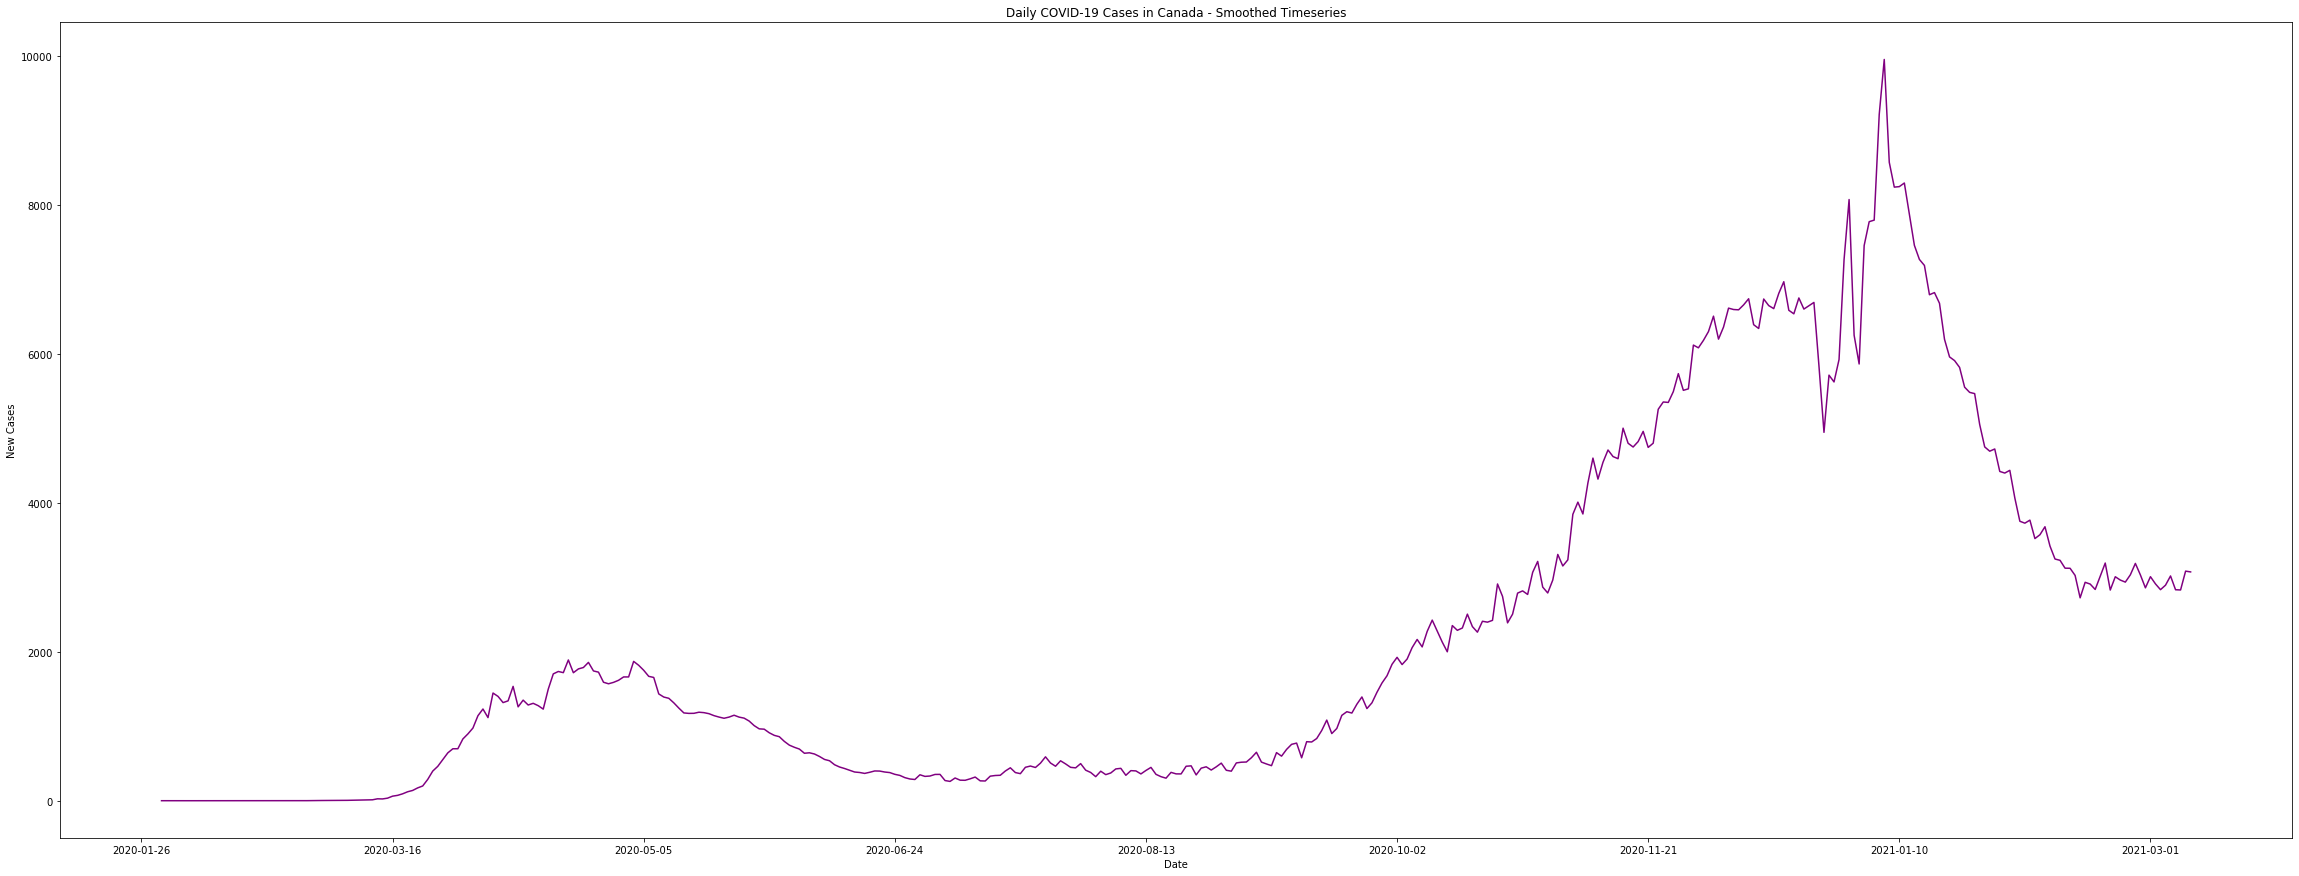

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv')
covidNewCases = (df[(df['date'] >= "2020-01-26") & (df['date'] <= "2021-03-09") 
                   & (df['location'] == 'Canada')])
covidNewCases.set_index('date', inplace=True)
fig, ax = plt.subplots(figsize=(40,15))
smoothed = covidNewCases.rolling(window=5).mean()
smoothed['new_cases'].plot(ax = ax, color='purple') 
plt.title("Daily COVID-19 Cases in Canada - Smoothed Timeseries")
plt.ylabel("New Cases")
plt.xlabel("Date")
plt.show()